<a href="https://colab.research.google.com/github/akdixit/data/blob/master/random_forest_98_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pit
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
malData=pd.read_csv("/content/gdrive/MyDrive/MalwareData (1).csv" )

In [ ]:
malData.head ( )

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.00000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.00000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.27273,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.00000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.50000,849,1300,72,18,1


In [ ]:
malData.shape

(138047, 57)

In [ ]:
malData.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [ ]:
legit= malData [0:41323].drop(["legitimate"],axis=1)
mal= malData [41323::].drop (["legitimate"], axis=1)
print("The shape of the legit dataset is: %s samples, %s features"%(legit.shape [0],legit.shape[1]))
print("The shape of the mal dataset is: %s samples, % s features" %(mal.shape[0], mal.shape [1]))

The shape of the legit dataset is: 41323 samples, 56 features
The shape of the mal dataset is: 96724 samples, 56 features


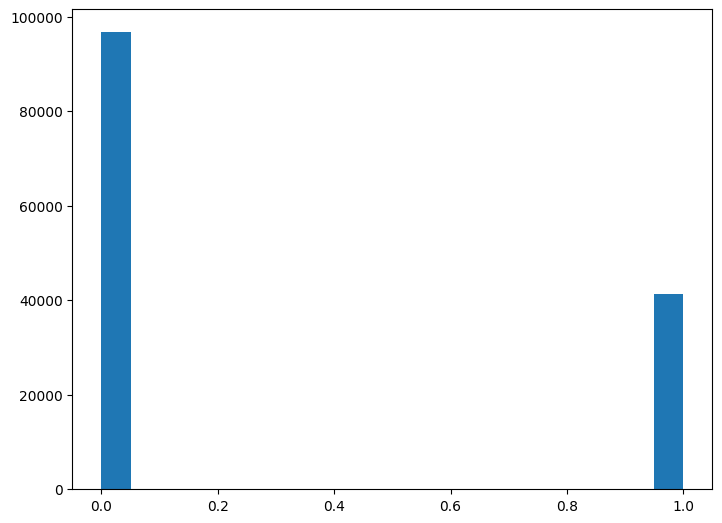

In [ ]:
import matplotlib
fig = pit.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(malData['legitimate'],20)
pit.show()

In [ ]:
y=malData['legitimate']
malData=malData.drop(['legitimate'],axis=1)

In [ ]:
malData=malData.drop(['Name'],axis=1)
malData=malData.drop(['md5'],axis=1)
print(" The Name and md5 variable are removed successfull")

 The Name and md5 variable are removed successfull


In [ ]:
malData.head ( )

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,332,224,258,9,0,361984,115712,0,6135,4096,...,0,4,3.262823,2.568844,3.537939,8797.00000,216,18032,0,16
1,332,224,3330,9,0,130560,19968,0,81778,4096,...,0,2,4.250461,3.420744,5.080177,837.00000,518,1156,72,18
2,332,224,3330,9,0,517120,621568,0,350896,4096,...,1,11,4.426324,2.846449,5.271813,31102.27273,104,270376,72,18
3,332,224,258,9,0,585728,369152,0,451258,4096,...,1,10,4.364291,2.669314,6.400720,1457.00000,90,4264,72,18
4,332,224,258,9,0,294912,247296,0,217381,4096,...,1,2,4.306100,3.421598,5.190603,1074.50000,849,1300,72,18


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(malData,y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(110437, 54)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
randomModel=clf.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,auc,confusion_matrix

In [ ]:
# Accuracy on the train dataset
train_pred=randomModel.predict(X_train)
accuracy_score(y_train,train_pred)


0.9828318407780001

In [ ]:
plt.plot(param_values, train_acc, label='Training Accuracy')
plt.plot(param_values, test_acc, label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Number of Trees')
plt.show()

In [ ]:
# Accuracy on the test dataset
prediction=randomModel.predict(X_test)
accuracy_score(y_test,prediction)

0.9838102136906918

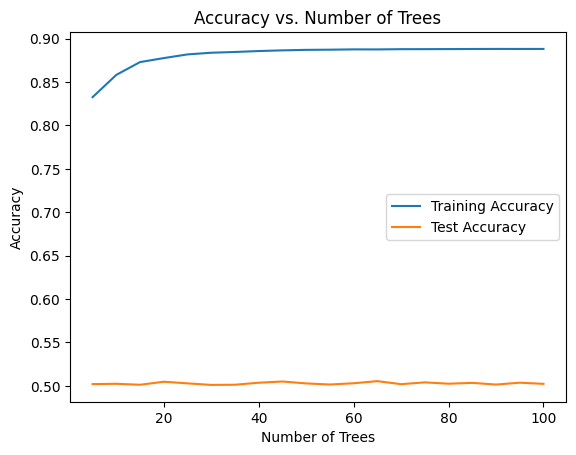

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
randomModel=clf.fit(X_train,y_train)

# Assuming you have your feature matrix X and target labels y

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(malData, y, test_size=0.2, random_state=42)

# Define the range of values for the parameter you want to vary (e.g., number of trees)
param_values = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

# Initialize lists to store accuracy values
train_acc = []
test_acc = []


# Train and evaluate the model for each parameter value
for param in param_values:
    # Create and fit the Random Forest classifier
    train_pred=randomModel.predict(X_train)
    test_pred=randomModel.predict(X_test)
    accuracy_score(y_train,train_pred)
    clf = RandomForestClassifier(n_estimators=param)
    clf.fit(X_train, y_train)

    # Make predictions on training and test sets
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    # Append accuracy scores to the lists
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

# Plot the accuracy graph
plt.plot(param_values, train_acc, label='Training Accuracy')
plt.plot(param_values, test_acc, label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Number of Trees')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a random classification dataset
X, y = make_classification(n_samples=138047, n_features=54, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(malData, y, test_size=0.2, random_state=42)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Lists to store the training and testing accuracies
train_accs = []
test_accs = []

# Train the random forest model and collect accuracy values
for i in range(1, 101):
    rf_classifier.fit(X_train, y_train)
    train_acc = rf_classifier.score(X_train, y_train)
    test_acc = rf_classifier.score(X_test, y_test)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

    # Print the current iteration and accuracy
    print(f"Iteration {i}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")

# Plot the accuracy graph
plt.plot(range(1, 101), train_accs, label='Train Accuracy')
plt.plot(range(1, 101), test_accs, label='Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Iteration 1: Train Accuracy = 0.8883, Test Accuracy = 0.5009
Iteration 2: Train Accuracy = 0.8883, Test Accuracy = 0.5009
Iteration 3: Train Accuracy = 0.8883, Test Accuracy = 0.5009


KeyboardInterrupt: ignored

In [ ]:
f1_score(y_test,prediction)

0.9730933606212002

In [ ]:
import numpy
from sklearn import metrics

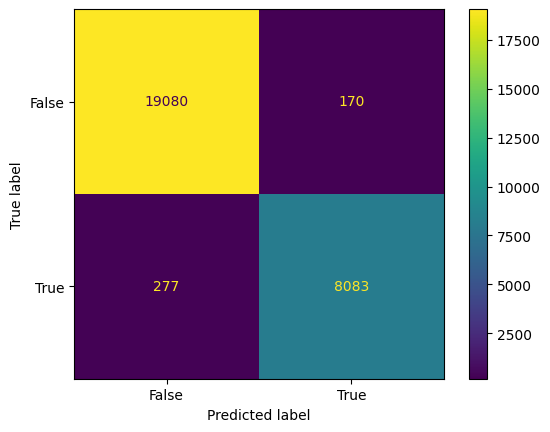

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,prediction)
cm_display =metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels = [False, True])
cm_display.plot ( )
pit.show()

Confusion Matrix:
[[19080   170]
 [  277  8083]]


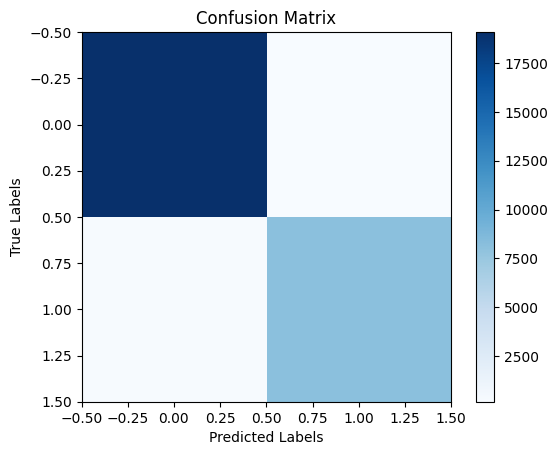

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have defined and fitted your model as 'randomModel'
y_pred = randomModel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
# plt.xticks(np.arange(len(classes)), classes)
# plt.yticks(np.arange(len(classes)), classes)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have the actual labels and predicted labels


# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract the values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate TPR and FPR
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)


True Positive Rate (TPR): 0.966866028708134
False Positive Rate (FPR): 0.008831168831168832
